In [1]:
#imports
import matplotlib.pyplot as plt
import scipy
import astropy.io
from astropy.io import fits
from astropy import wcs
import numpy as np
from numpy import append
import healpy as hp
from cosmology import *
from scipy.interpolate import *
import pixell
from pixell import reproject, enplot, enmap, utils
import tarfile
import orphics
from orphics import catalogs

In [2]:
def load_fits(fits_file,column_names,hdu_num=1,Nmax=None):
    hdu = fits.open(fits_file)
    columns = {}
    for col in column_names:
        columns[col] = hdu[hdu_num].data[col][:Nmax]
    hdu.close()
    return columns

In [3]:
column_names = 'RADeg', 'decDeg', 'SNR'

In [4]:
PLA = '/home1/mathm/act/hiltonm/cluster_candidates/dr6-3freq-multipass-20220404/dr6-3freq-multipass_optimalCatalog.fits'

In [5]:
funct = load_fits(PLA, column_names, hdu_num=1,Nmax=None)

In [6]:
funct

{'RADeg': array([4.11930200e-03, 2.08464020e-02, 2.67377905e-02, ...,
        3.59954338e+02, 3.59994736e+02, 3.59992188e+02]),
 'decDeg': array([ 10.0399687 ,  -9.03331475, -38.62231396, ..., -21.38771626,
         -6.40981662, -32.93712566]),
 'SNR': array([5.34839148, 4.37888749, 5.66790454, ..., 5.12519299, 5.22445898,
        5.94858729])}

In [7]:
RA_array = funct['RADeg']
dec_array = funct['decDeg']
SNR_array = funct['SNR']

In [8]:
SNR_array

array([5.34839148, 4.37888749, 5.66790454, ..., 5.12519299, 5.22445898,
       5.94858729])

In [9]:
RA_array

array([4.11930200e-03, 2.08464020e-02, 2.67377905e-02, ...,
       3.59954338e+02, 3.59994736e+02, 3.59992188e+02])

In [10]:
np.array(SNR_array)

array([5.34839148, 4.37888749, 5.66790454, ..., 5.12519299, 5.22445898,
       5.94858729])

In [11]:
def SNR_selection(list, n):
    return list[np.greater(SNR_array, n)]

In [12]:
RA_selected = SNR_selection(RA_array, 5)
dec_selected = SNR_selection(dec_array, 5)
SNR_selected = SNR_selection(SNR_array, 5)

In [13]:
# Converts colatitude and longitude into declination and right assencion
# Theta = colatitude, phi = longitude

def read_halo(i):
    return dec_selected[i], RA_selected[i]

In [14]:
plc_map = hp.read_map('PLA_data.fits')
# reproject the Planck map (healpix -> CAR)
fshape, fwcs = enmap.fullsky_geometry(res=2.0 * utils.arcmin, proj="car")
plc_map = plc_map.astype(np.float64)
pmap = reproject.healpix2map(plc_map, fshape, fwcs, lmax=6000, rot="gal,equ")

In [15]:
# Creates thumbnail around selected coordinates
def thumbnail(i, list, enmap):
    coords = list(i)
    return reproject.thumbnails(enmap,coords,r=10*utils.arcmin)

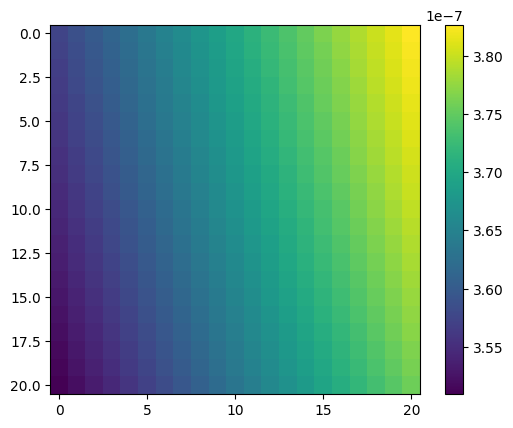

In [16]:
plt.imshow(thumbnail(4, read_halo, pmap))
plt.colorbar()

In [17]:
ACT = '/home1/mathm/act/sigurdkn/coadds/dr6v3/act_daynight_f150_map_srcfree.fits'

In [20]:
ACTmap = enmap.read_map(ACT)[0]

In [ ]:
a = thumbnail(2, read_halo, ACTmap)
print(a.shape)
print(a.dtype)

In [28]:
plt.imshow(thumbnail(2, read_halo, ACTmap))
plt.colorbar()

KeyboardInterrupt: 